In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Num GPUs Available:  2


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
file_path = "../output/training_data/train.csv"
data = pd.read_csv(file_path)

# Separate image file names and labels
image_file_names = data['name'].values
labels = data['image_category'].values

# Encode categorical labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [18]:
data = data[data['len_of_boundry_inv']!=0]

In [19]:
image_data = []
for image_file in image_file_names:
    # Load, preprocess, and resize the images
    image = tf.keras.preprocessing.image.load_img('../output/tiles/' + image_file, color_mode='grayscale', target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image /= 255.0  # Normalize pixel values

    image_data.append(image)

image_data = np.array(image_data)


In [20]:
X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

In [34]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [82]:
model = keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    #BatchNormalization(),
    #Dropout(0.3),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    MaxPooling2D(2, 2),
    #Conv2D(128, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax') 
])


In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
def showDetails(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


In [84]:
history10 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
157/157 [==============================] - 4s 20ms/step - loss: 0.9506 - accuracy: 0.7007 - val_loss: 0.6551 - val_accuracy: 0.7514
Epoch 2/15
157/157 [==============================] - 2s 16ms/step - loss: 0.6145 - accuracy: 0.7597 - val_loss: 0.6414 - val_accuracy: 0.7697
Epoch 3/15
157/157 [==============================] - 3s 16ms/step - loss: 0.5358 - accuracy: 0.7878 - val_loss: 0.6786 - val_accuracy: 0.7673
Epoch 4/15
157/157 [==============================] - 2s 16ms/step - loss: 0.4630 - accuracy: 0.8083 - val_loss: 0.6674 - val_accuracy: 0.7649
Epoch 5/15
157/157 [==============================] - 3s 16ms/step - loss: 0.3785 - accuracy: 0.8438 - val_loss: 0.7397 - val_accuracy: 0.7570
Epoch 6/15
157/157 [==============================] - 2s 16ms/step - loss: 0.3290 - accuracy: 0.8888 - val_loss: 0.8130 - val_accuracy: 0.7578
Epoch 7/15
157/157 [==============================] - 3s 16ms/step - loss: 0.2647 - accuracy: 0.9231 - val_loss: 0.9168 - val_accuracy: 0.7538

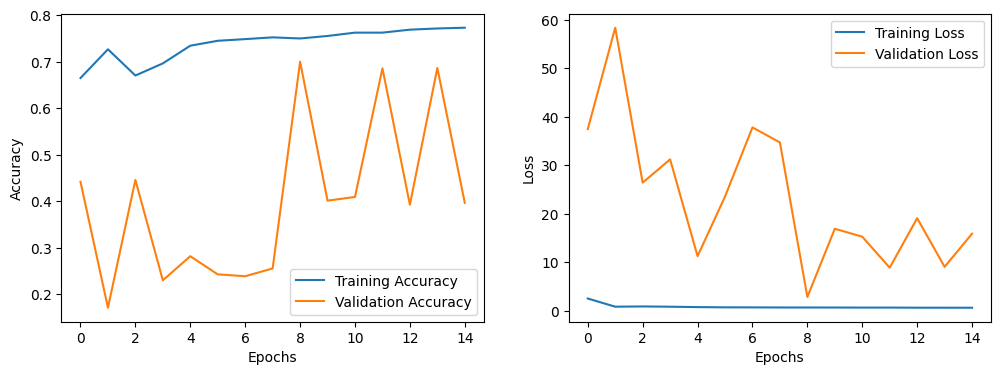

In [81]:
showDetails(history10)

In [12]:
model20 = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])
model20.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history20 = model20.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
190/190 [==============================] - 9s 42ms/step - loss: 0.5248 - accuracy: 0.8004 - val_loss: 0.4162 - val_accuracy: 0.8382
Epoch 2/20
190/190 [==============================] - 6s 31ms/step - loss: 0.3956 - accuracy: 0.8487 - val_loss: 0.4030 - val_accuracy: 0.8336
Epoch 3/20
190/190 [==============================] - 6s 31ms/step - loss: 0.3530 - accuracy: 0.8645 - val_loss: 0.4147 - val_accuracy: 0.8296
Epoch 4/20
190/190 [==============================] - 6s 31ms/step - loss: 0.3098 - accuracy: 0.8873 - val_loss: 0.4429 - val_accuracy: 0.8058
Epoch 5/20
190/190 [==============================] - 6s 32ms/step - loss: 0.2706 - accuracy: 0.9057 - val_loss: 0.4594 - val_accuracy: 0.8309
Epoch 6/20
190/190 [==============================] - 6s 32ms/step - loss: 0.2327 - accuracy: 0.9233 - val_loss: 0.5100 - val_accuracy: 0.8375
Epoch 7/20
190/190 [==============================] - 6s 31ms/step - loss: 0.2142 - accuracy: 0.9314 - val_loss: 0.5792 - val_accuracy: 0.8269

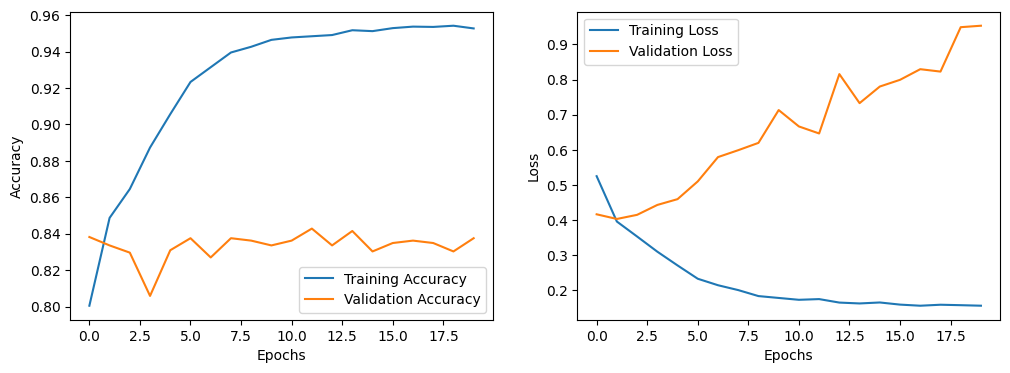

: 

In [13]:
showDetails(history20)